280173
0.0001120692 , -7.27475821804546e-08


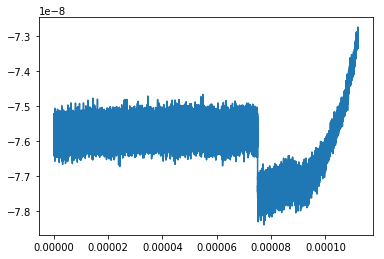

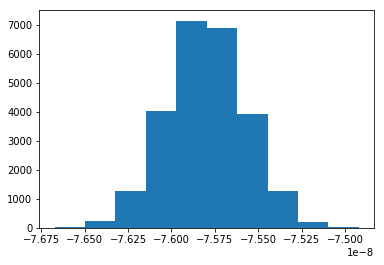

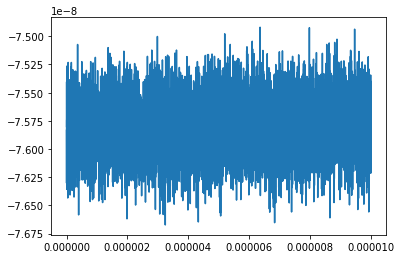

Statistics=0.886, p=0.642
0 <time< 0
-0.014491837911476818
Sample looks Gaussian (ACCEPT)
The mode value is -7.58007701051611e-08


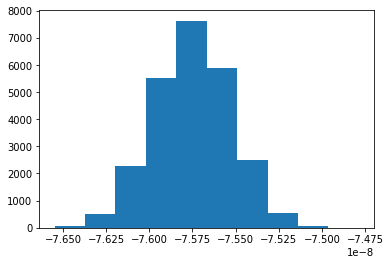

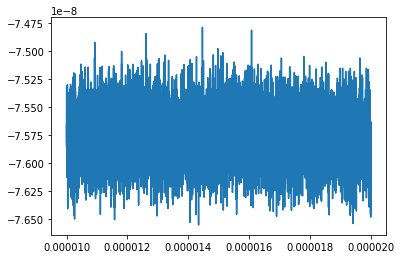

Statistics=3.095, p=0.213
0 <time< 1
-0.011097947546683412
Sample looks Gaussian (ACCEPT)
The mode value is -7.57506626314353e-08


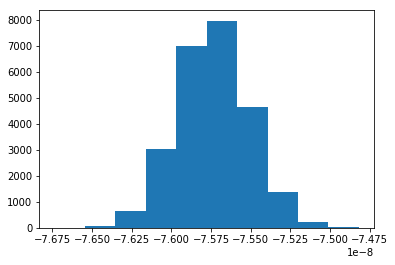

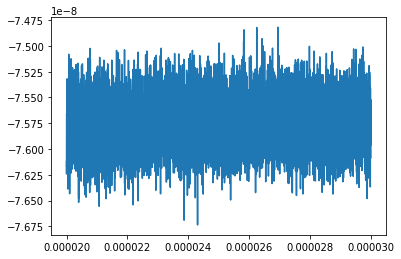

Statistics=0.373, p=0.830
1 <time< 1
0.00834912116497937
Sample looks Gaussian (ACCEPT)
The mode value is -7.57369136294983e-08


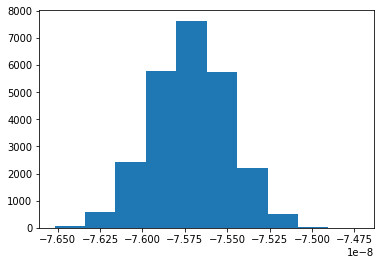

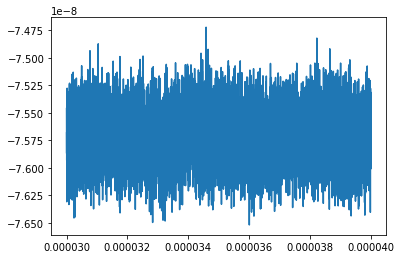

Statistics=6.019, p=0.049
1 <time< 2
-0.015073889692656491
Sample looks Gaussian (ACCEPT)
The mode value is -7.571374283088519e-08


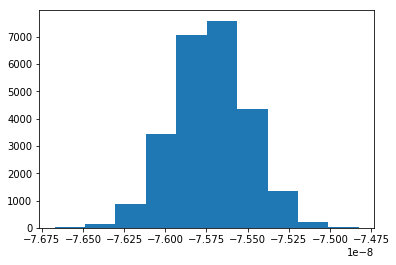

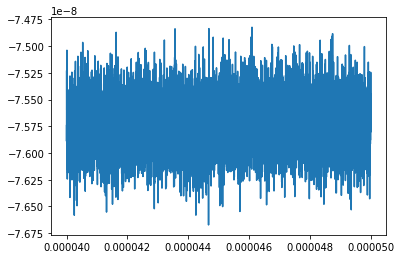

Statistics=6.079, p=0.048
2 <time< 2
0.010492090797425569
Sample looks Gaussian (ACCEPT)
The mode value is -7.57245715021782e-08


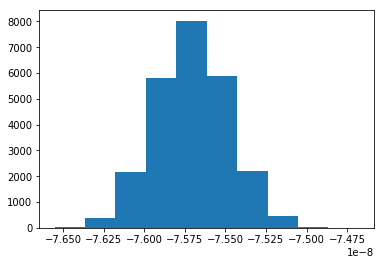

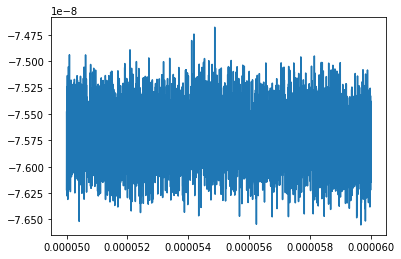

Statistics=4.957, p=0.084
2 <time< 3
0.031173350386372294
Sample looks Gaussian (ACCEPT)
The mode value is -7.57075682145114e-08


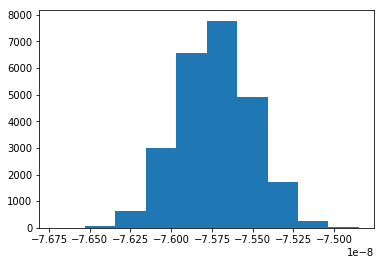

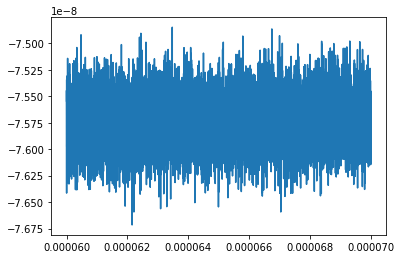

Statistics=3.012, p=0.222
3 <time< 3
0.006755879594197183
Sample looks Gaussian (ACCEPT)
The mode value is -7.573186877607441e-08


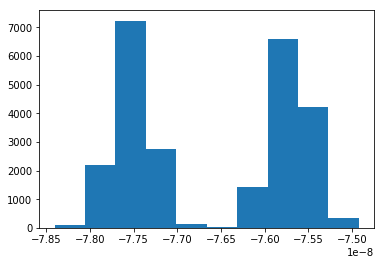

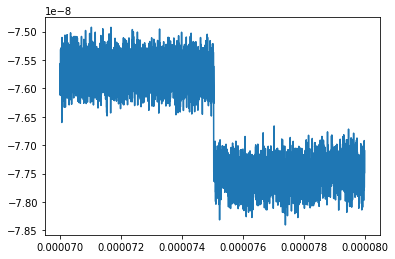

Statistics=0.582, p=0.747
3 <time< 4
-0.01181720644490054
Sample looks Gaussian (ACCEPT)
The mode value is -7.6248632296938e-08


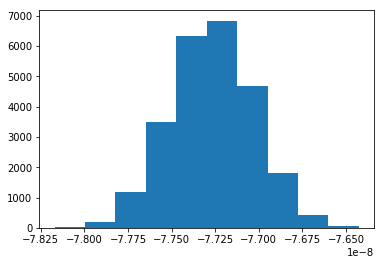

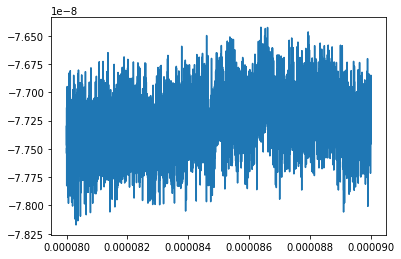

Statistics=15.271, p=0.000
4 <time< 4
-0.006966331020642954
Sample does not look Gaussian (NOPE)
The median value is -7.72676358451463e-08
-1.653959268802868e-10


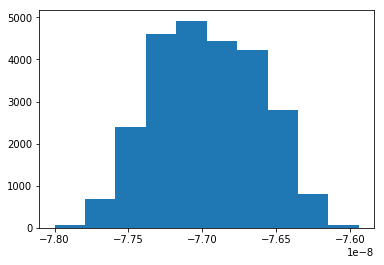

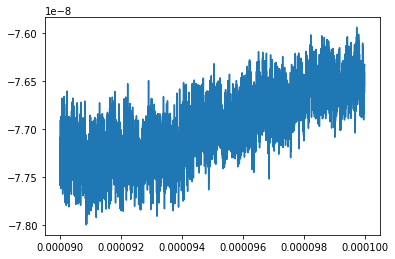

Statistics=1582.183, p=0.000
4 <time< 5
0.038390169713952545
Sample does not look Gaussian (NOPE)
The median value is -7.697754966784491e-08
-8.310609066105136e-10


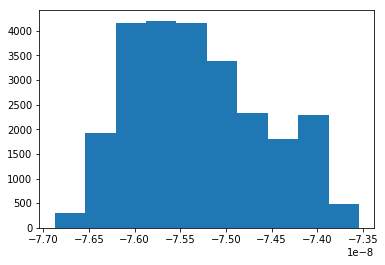

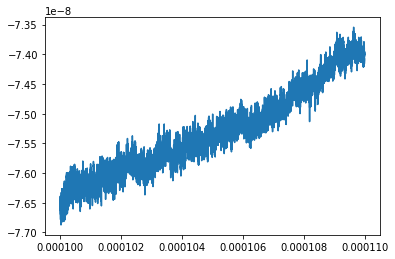

Statistics=2774.161, p=0.000
5 <time< 5
0.356320934609802
Sample does not look Gaussian (NOPE)
The median value is -7.53799511699071e-08
-2.3134161940182195e-09

3
-1.5169732137109994e-09


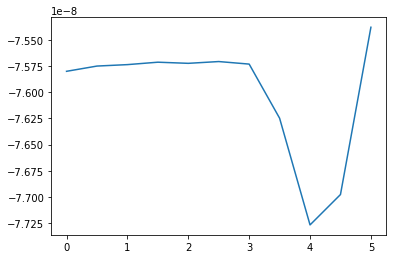

In [22]:
import pandas as pd
import operator
import pylab
import numpy as np
from numpy import median
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import statistics
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
thislist= list()
times = list()
kurtoses = list()
modes = list()
#show_inline_matplotlib_plots() 

sd = pd.read_csv('a10r10_02.csv')
sd.t = sd.t/50000
max_index, max_value = max(enumerate(sd.defl), key=operator.itemgetter(1))
print(max_index)
print(str(sd.t[max_index])+' , '+ str(sd.defl[max_index]))
sd = sd[1:max_index]
num = 0;
plt.plot(sd.t,sd.defl)
plt.show()
for x in range(25000, len(sd.defl), 25000):
        y=x-24999
        data = sd.defl[y:x]
        hello= kurtosis(data)
        kurtoses.append(hello)
        
        #pvalues.append(p)
        f1 = plt.figure()
        f2 = plt.figure()
        ax1 = f1.add_subplot(111)
        ax1.hist(data)
        ax2 = f2.add_subplot(111)
        ax2.plot(sd.t[y:x],sd.defl[y:x])
        plt.show()
        stat, p = normaltest(data)
        
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print(str(int(y/5e4))+' <time< '+str(int(x/5e4)))
        print(skew(sd.defl[y:x]))
        # interpret
        alpha = 0.01
        if p > alpha:
            print('Sample looks Gaussian (ACCEPT)')
            print('The mode value is '+ str(median(data)))
            times.append((int(y/5e4)+int(x/5e4))/2)
            modes.append(median(data))
        else:
            modes1 = list()
            times1 = list()
            print('Sample does not look Gaussian (NOPE)')
            num= num+1;
            print('The median value is '+ str(median(data)))
            print(statistics.mean(data[1000:2500])-statistics.mean(data[24000:24500]))
            times.append((int(y/5e4)+int(x/5e4))/2)
            modes.append(median(data))
            for z in range(25000, len(data), 25000):
                a = z-24999
                data1 = data[a:z]
                stat1, p1 = normaltest(data1)
                f3 = plt.figure()
                f4 = plt.figure()
                ax3 = f3.add_subplot(111)
                ax3.hist(data)
                ax4 = f4.add_subplot(111)
                ax4.plot(sd.t[a:z],sd.defl[a:z])
                plt.show()
                print('Statistics=%.3f, p=%.3f' % (stat1, p1))
                alpha = 0.001
                if p1 > alpha:
                    print("IN A JUMP")
                    print('Sample looks Gaussian (ACCEPT)')
                    print('The mode value is '+ str(median(data1)))
                    #times.append((int(a/5e4)+int(z/5e4))/2)
                    #modes.append(median(data1))
                else:
                    print("IN A JUMP")
                    print('Sample does not look Gaussian (NOPE)')
                    print('The median value is '+ str(median(data)))
                    print(statistics.mean(data[1000:2500])-statistics.mean(data[4000:4500]))
                    #times.append((int(a/5e4)+int(z/5e4))/2)
                    #modes.append(median(data))
            
print(*thislist, sep=', ')
#print(min(thislist, key=abs))
#print(max(thislist, key=abs))
print(num)
print(min(modes)-modes[1])
plt.plot(times,modes)
plt.show()

In [17]:
clear


In [37]:
import pandas as pd
import operator
import numpy as np
from numpy import median
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import statistics
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
thislist= list()
times = list()
kurtoses = list()
modes = list()
#show_inline_matplotlib_plots() 
sd = pd.read_csv('a1r1_00.csv')
sd.t = sd.t/50000
max_index, max_value = max(enumerate(sd.defl), key=operator.itemgetter(1))
print(max_index)
print('Max value is:'+str(sd.t[max_index])+' , '+ str(sd.defl[max_index]))
plt.plot(sd.t,sd.defl)
sd = sd[1:max_index+100]
plt.plot(sd.t,sd.defl)
plt.show()

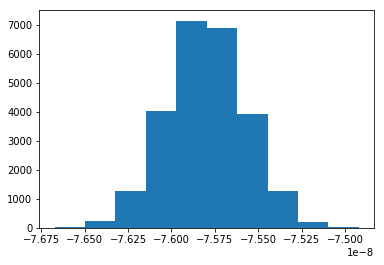

kurtosis: 0.002442963557956368
0 <time< 0
Sample looks Gaussian (ACCEPT)
The median value is -7.58007701051611e-08


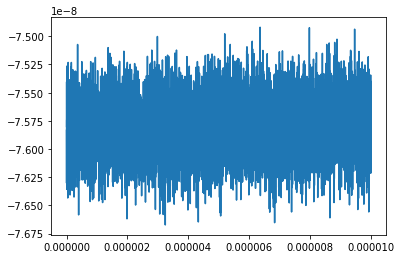

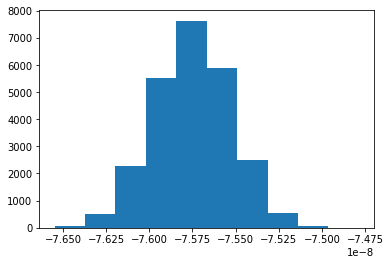

kurtosis: -0.0492348546223087
0 <time< 1
Sample looks Gaussian (ACCEPT)
The median value is -7.57506626314353e-08


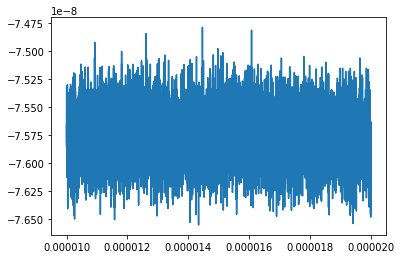

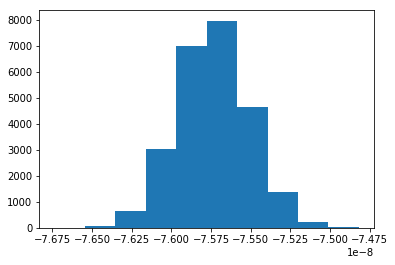

kurtosis: 0.008215464936609074
1 <time< 1
Sample looks Gaussian (ACCEPT)
The median value is -7.57369136294983e-08


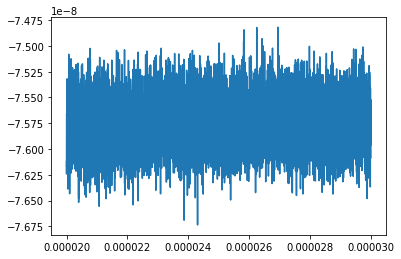

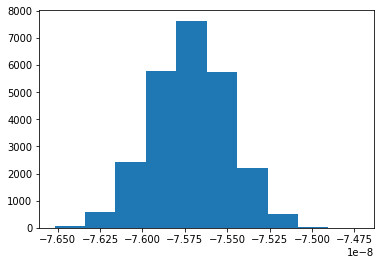

kurtosis: -0.06806229734311975
1 <time< 2
Sample looks Gaussian (ACCEPT)
The median value is -7.571374283088519e-08


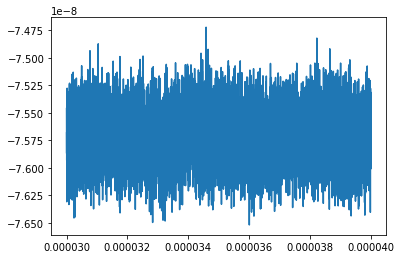

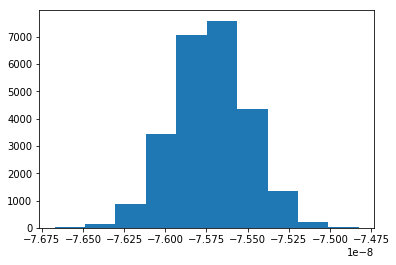

kurtosis: 0.07542325091608415
2 <time< 2
Sample looks Gaussian (ACCEPT)
The median value is -7.57245715021782e-08


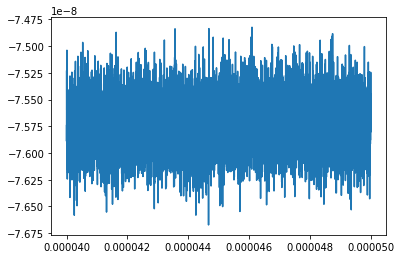

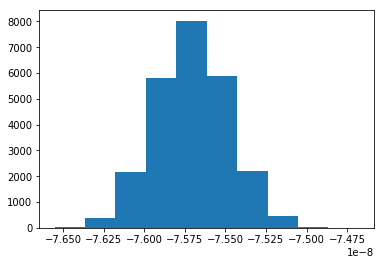

kurtosis: 0.029202391452323173
2 <time< 3
Sample looks Gaussian (ACCEPT)
The median value is -7.57075682145114e-08


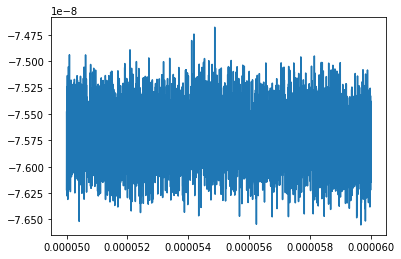

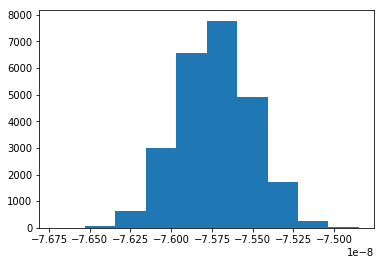

kurtosis: -0.05138918413226046
3 <time< 3
Sample looks Gaussian (ACCEPT)
The median value is -7.573186877607441e-08


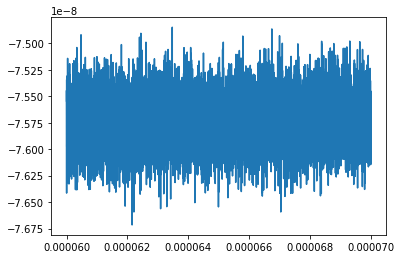

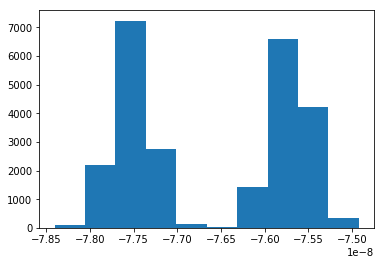

kurtosis: -1.7845007959829062
3 <time< 4
Sample does not look Gaussian (NOPE)
It is jumping here
3.50002 <time< 4.0
There is no jump, it is an approach or retraction sequence


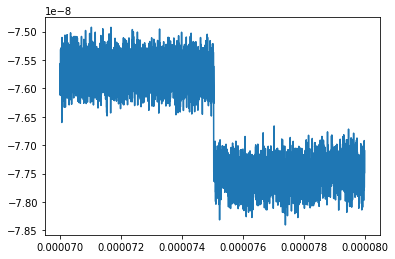

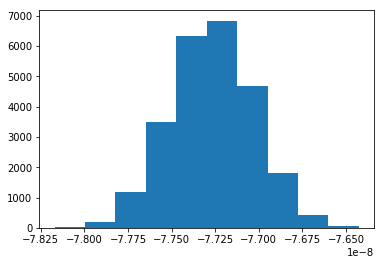

kurtosis: -0.11399247895022491
4 <time< 4
Sample does not look Gaussian (NOPE)
It is jumping here
It is jumping here


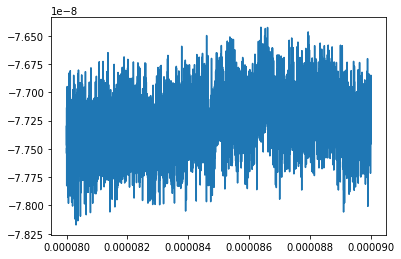

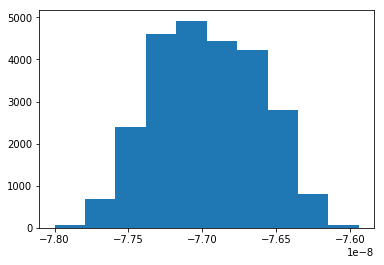

kurtosis: -0.7372366672377986
4 <time< 5
Sample does not look Gaussian (NOPE)
It is jumping here
It is jumping here


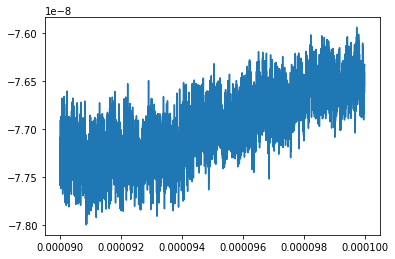

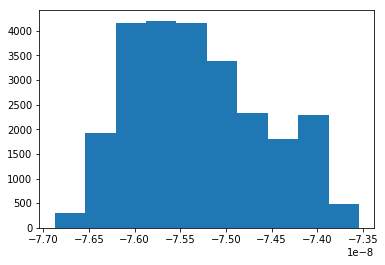

kurtosis: -0.8146500307303888
5 <time< 5
Sample does not look Gaussian (NOPE)
It is jumping here
5.00002 <time< 5.5
There is no jump, it is an approach or retraction sequence


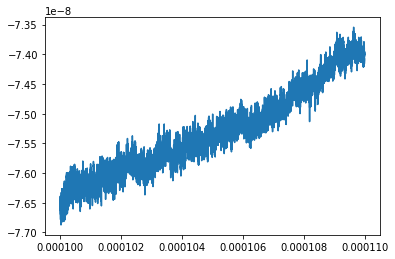

In [18]:
for x in range(25000, len(sd.defl), 25000):
        y=x-24999#y to x is the range of the times(each second)
        data = sd.defl[y:x]
        hello= kurtosis(data)
        #kurtoses.append(hello)
        f1 = plt.figure()
        ax1 = f1.add_subplot(111)
        ax1.hist(data)
        plt.show()
        print('kurtosis: '+str(hello))
        print(str(int(y/5e4))+' <time< '+str(int(x/5e4)))
        plt.plot(sd.t[y:x],data)
        alpha = 0.1
        hello = abs(hello)
        if hello < alpha:
            print('Sample looks Gaussian (ACCEPT)')
            print('The median value is '+ str(median(data)))
            times.append((int(y/5e4)+int(x/5e4))/2)
            modes.append(median(data))
        else:
            print('Sample does not look Gaussian (NOPE)')
#           print('The median value is '+ str(median(data)))
            for i in range(10000, len(sd.defl[y:x]), 10000):
                    j=i-9999
                    data1 = data[j:i]
                    fred= kurtosis(data1)
                    fred = abs(fred)
                    
                    if fred<0.5:
                        print("It is jumping here")
                    else:
                        first = data[1:10]
                        last = data[(len(data)-10):len(data)]
                        answer  = median(first) - median(last)
                        print(str(float(y/5e4))+' <time< '+str(float(x/5e4)))
                        print('There is no jump, it is an approach or retraction sequence')
                        times.append((int(y/5e4))+(int(j/5e4)))
                        modes.append(median(data1))

In [ ]:
plt.plot(times,modes,'ro')
plt.show()
print(*times)
#print(*modes)
from collections import Counter
cnt = Counter(times)
print ('Times of Jumps: '+str([k for k, v in cnt.items() if v > 1]))
